In [2]:
import torch
from easy_transformer import EasyTransformer

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
print(f"Using {device} device")
torch.set_grad_enabled(False)

model = EasyTransformer.from_pretrained('gpt2').to(device)

# Convenience function for decoding token
decode = model.tokenizer.decode

# Convenience function for encoding token
def encode(t):
    global model
    result = model.tokenizer.encode(t)
    if len(result) != 1:
        raise Exception(f"Not a single token: {t}")
    return result[0]

unembed = model.unembed.W_U.data
embed = model.embed.W_E.data
d_M = model.cfg.d_model
d_V = model.cfg.d_vocab

print(unembed.shape, embed.shape, d_M, d_V)

Using cpu device
Loading model: gpt2


/home/giles/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Using pad_token, but it is not set yet.


Moving model to device:  cpu
Finished loading pretrained model gpt2 into EasyTransformer!
Moving model to device:  cpu
torch.Size([768, 50257]) torch.Size([50257, 768]) 768 50257


In [40]:
embed2 = torch.linalg.pinv(unembed)

matrix = torch.matmul(unembed, embed)
eigenvalues, eig = torch.linalg.eig(matrix)
eig = eig.real.T

for i in range(50):
    v = eig[i,:]
    logits = torch.matmul(v, unembed)
    values = [(v.item(), t) for t,v in enumerate(logits)]
    values.sort(reverse=True)
    print(f'+++ Eigenvector {i}+++ ({eigenvalues[i].item()})')
    string = ''
    for val, t in values[:6]:
        string += f'{decode(t):20}'
    print(string)
    string = ''
    for val, t in values[-6:]:
        string += f'{decode(t):20}'
    print(string)

+++ Eigenvector 0+++ ((11843.9267578125+0j))
DragonMagazine      Dispatch            Cola                Community           STEM                Sport               
 tightening          prone               scrambling          breathing           propensity          imperson           
+++ Eigenvector 1+++ ((8358.009765625+0j))
 tremend             carbohyd            challeng           undai                confir              satell             
 Bull                Holiday             Deer                Diamond             Derby               Beaver             
+++ Eigenvector 2+++ ((6802.81884765625+0j))
Data                Recommend           Program             User                Current             Use                 
 Canaver             tyr                ��                   Seym                tiss                tremend            
+++ Eigenvector 3+++ ((5722.22216796875+0j))
 behavi             CLASSIFIED           Organizations      PDATE                Policies       

+++ Eigenvector 29+++ ((2547.2490234375+0j))
 yak                Arizona              Yak                 sage                meteor             lahoma              
 mould               sexuality           UKIP                paed                Notting             ITV                
+++ Eigenvector 30+++ ((2505.23974609375+0j))
 vocational         Tok                  canceled           三                   Shin                 postponed          
 Britons             analys             avour                Niger              yip                  Australians        
+++ Eigenvector 31+++ ((2493.446533203125+0j))
 habitat             habitats            camouflage          skirt               encompasses         silhouette         
perors              ournaments          ithing               fasting            rowing               coughing           
+++ Eigenvector 32+++ ((2441.568603515625+0j))
女                    Billion             depos               Pik                 Yuri    

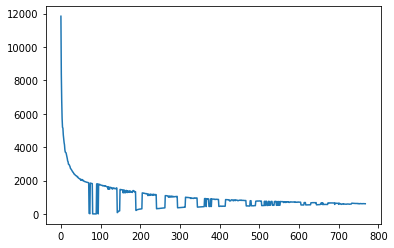

In [41]:
import matplotlib.pyplot as plt

plt.plot(range(d_M), eigenvalues.real)

In [9]:
from sklearn.decomposition import TruncatedSVD
U = torch.tensor(TruncatedSVD(n_components=50).fit_transform(unembed))
print(U.shape)

for i,v in enumerate(U.T[:5,:]):
    logits = torch.matmul(v, unembed)
    values = [(v.item(), t) for t,v in enumerate(logits)]
    values.sort(reverse=True)
    print(f'+++ Vector {i}+++ ')
    string = ''
    for val, t in values[:6]:
        string += f'{decode(t):20}'
    print(string)
    string = ''
    for val, t in values[-6:]:
        string += f'{decode(t):20}'
    print(string)

torch.Size([768, 50])
+++ Vector 0+++ 
Dispatch            Community           Kids                Motor               Stars               NAS                 
 raiding             breathing           prone               stocking            propensity          imperson           
+++ Vector 1+++ 
 Derby               Beaver              Discovery           Bull                Deer                Pearl              
sembly              ntil                 carbohyd            tremend            merce               undai               
+++ Vector 2+++ 
ogun                anamo               arcity              ibaba               rique               igree               
Recommend           PRES                CLASS               Recomm              CONCLUS             DATA                
+++ Vector 3+++ 
 behavi              conflic             millenn            ��                   mathemat           ailability          
mar                 h                   sh                  f  